# The purpose of this assignment is the give an answer to the ultimate question of the universe (it's not 42).
## Is the police force racist? use pandas

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('datasets/dataset_stop_and_searchB.csv')

In [5]:
df.shape

(10354, 6)

In [6]:
df.columns

Index(['Gender', 'Age', 'Suspect-ethnicity', 'Officer-ethnicity',
       'Object of search', 'Outcome'],
      dtype='object')

In [7]:
df.dtypes

Gender               object
Age                  object
Suspect-ethnicity    object
Officer-ethnicity    object
Object of search     object
Outcome              object
dtype: object

In [8]:
df.describe(include="all")

,Gender,Age,Suspect-ethnicity,Officer-ethnicity,Object of search,Outcome
count,10290,10169,9746,10165,10300,10354
unique,3,5,17,5,6,8
top,Male,18-24,White - White British (W1),White,Controlled drugs,Nothing found - no further action
freq,9278,3915,5845,7022,7209,6590


In [9]:
df['Suspect-ethnicity'].unique()

array(['White - White British (W1)',
       'Black or Black British - Caribbean (B1)', 'Not Stated (NS)',
       'Asian or Asian British - Indian (A1)',
       'White - Any other White ethnic background (W9)', nan,
       'Black or Black British - African (B2)',
       'Mixed - White and Asian (M3)',
       'Mixed - Any other Mixed ethnic background (M9)',
       'Asian or Asian British - Pakistani (A2)',
       'Mixed - White and Black Caribbean (M1)',
       'Chinese or other ethnic group - Chinese (O1)',
       'Black or Black British - Any other Black ethnic background (B9)',
       'Asian or Asian British - Any other Asian ethnic background (A9)',
       'Mixed - White and Black African (M2)',
       'Chinese or other ethnic group - Any other ethnic group (O9)',
       'White - White Irish (W2)',
       'Asian or Asian British - Bangladeshi (A3)'], dtype=object)

In [10]:
df['Officer-ethnicity'].unique()

array(['White', 'Black', 'Asian', nan, 'Other', 'Mixed'], dtype=object)

## Cleaning of the dataset
We delete missing values or values which cannot be used, such as 'Not Stated (NS)'

In [11]:
df_clean = (df[(df['Officer-ethnicity'].notnull()) & 
               (df['Suspect-ethnicity'].notnull()) &
               (df['Suspect-ethnicity'] != 'Not Stated (NS)')]).copy()
df_clean.reset_index(inplace=True, drop=True)

In [12]:
df.shape

(10354, 6)

In [13]:
df_clean.shape

(8959, 6)

Simplifying the dataset by reducing the ethnicities to White, Black, Asian, Chinise, Mixed, Other.
This simplification is done by using only the first word in the enthnicity string.

In [14]:
df_clean['Suspect-ethnicity'] = df_clean['Suspect-ethnicity'].str.split().map(lambda l : l[0])

Simple function to plot a piechart of the unique values

In [24]:
def plot_pie_count_key(values, title):
    unique_values = values.unique()
    total = values.count()
    count_of_values = [(values == val).sum() for val in unique_values]
    plt.xlabel(title)
    plt.pie(count_of_values, labels=unique_values, autopct='%1.1f%%', startangle=90)

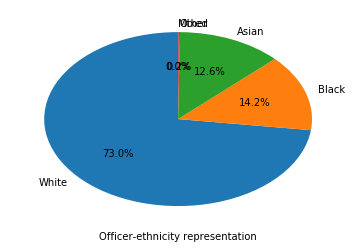

In [25]:
plot_pie_count_key(df_clean['Officer-ethnicity'], "Officer-ethnicity representation")

Looking at the first pie chart we can see that in the police force, the stop and search representation by officer ethnicity. Most stop and searches are conducted by White officers, this may be due to that there are more White police officers in the police force.

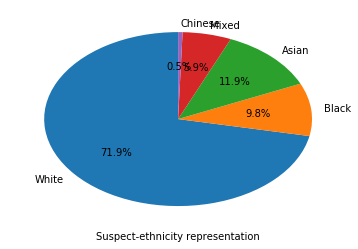

In [26]:
plot_pie_count_key(df_clean['Suspect-ethnicity'], "Suspect-ethnicity representation")

Looking at the second pie chart we can observe that most supects have White ethnicity, probably due to population demographics. As you can see the two pie charts are really similar to each other.

Based on this trivial analisys, I would say the police force is NOT racist, since they hiring various etnicities and the percentages of suspects they investigate are similar to their ethnicities percentage.

### Now we will make pie charts for each officer ethnicity, to visualize the ethnicity of the suspects
Ideally the same ethnicity officer would search and stop same ethnicity suspects. If this is not the case, it would suggest that there is racism in the police force, since the officers are prejuidicially stopping and searching suspects whose ethnicity is different from theirs. 

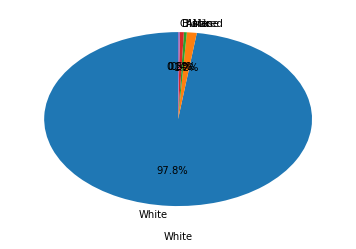

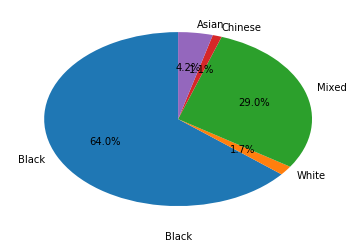

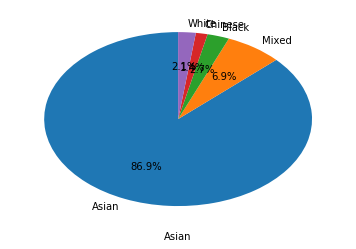

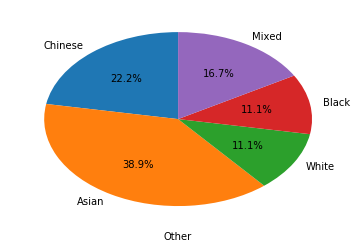

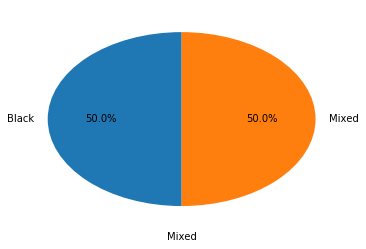

In [27]:
for officer_eth in df_clean['Officer-ethnicity'].unique():
    to_plot = (df_clean[df_clean['Officer-ethnicity'] == officer_eth])['Suspect-ethnicity']
    plot_pie_count_key(to_plot, officer_eth)
    plt.show()

As you can see on these charts the police officers are usually investigating the same ethnicity suspects as themselves, so again, we can conclude based on this data, that the police officers are NOT racist.

In [30]:
df_clean['Outcome'].unique()

array(['Article found - Detailed outcome unavailable',
       'Nothing found - no further action', 'Suspect arrested',
       'Offender cautioned', 'Suspect summonsed to court',
       'Local resolution', 'Offender given drugs possession warning',
       'Offender given penalty notice'], dtype=object)